In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy as sp
import pandas as pd
import xarray as xr
import pytest

from climate_index_collection.data_loading import VARNAME_MAPPING, load_data_set
from climate_index_collection.indices import (
    sea_air_surface_temperature_anomaly_north_all,
    sea_air_surface_temperature_anomaly_north_ocean,
    sea_air_surface_temperature_anomaly_north_land,
    sea_air_surface_temperature_anomaly_south_all,
    sea_air_surface_temperature_anomaly_south_ocean,
    sea_air_surface_temperature_anomaly_south_land,
)

filepath = os.getcwd()
print(filepath)

/work/notebooks


Value    0.44711
dtype: float64

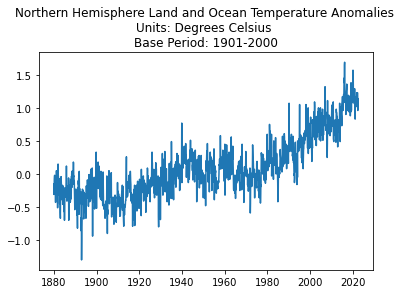

In [2]:
noaa_data = pd.read_csv('SASTAI-1880-2022.csv', header = 4)
noaa_data['time'] = pd.to_datetime(noaa_data['Year'], format='%Y%m',)
noaa_data = noaa_data.set_index('time')
noaa_data = noaa_data.drop("Year", axis=1)
display(noaa_data.std())
plt.plot(noaa_data)
plt.title("Northern Hemisphere Land and Ocean Temperature Anomalies \nUnits: Degrees Celsius \nBase Period: 1901-2000");

### As one can see above, the data from NOAA is not standardized.

### Lets also see if the three indices give different values.

In [3]:
FOCI_alldata = load_data_set(data_path="../data/test_data/", data_source_name="FOCI")
CESM_alldata = load_data_set(data_path="../data/test_data/", data_source_name="CESM")

/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


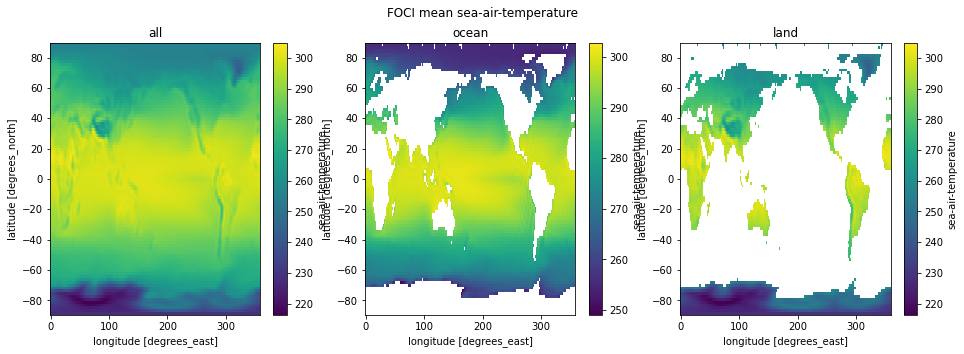

In [25]:
fig, axs = plt.subplots(ncols = 3, figsize = (16,5))
axs = axs.flatten()
fig.suptitle("FOCI mean sea-air-temperature")
FOCI_alldata["sea-air-temperature"].mean("time").plot(ax = axs[0])
FOCI_alldata["sea-air-temperature"].where(FOCI_alldata["is_over_ocean"]).mean("time").plot(ax = axs[1])
FOCI_alldata["sea-air-temperature"].where(~FOCI_alldata["is_over_ocean"]).mean("time").plot(ax = axs[2])
axs[0].set_title("all")
axs[1].set_title("ocean")
axs[2].set_title("land")
fig.savefig("FOCI-mean-sea-air-temperature")

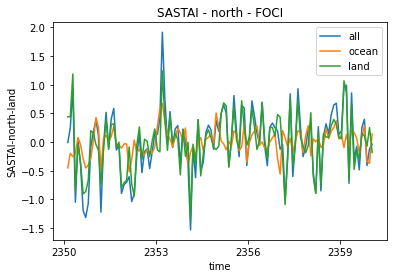

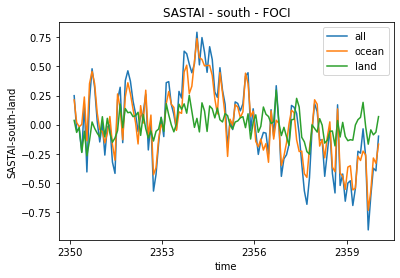

In [26]:
plt.figure()
sea_air_surface_temperature_anomaly_north_all(FOCI_alldata).plot(label = "all")
sea_air_surface_temperature_anomaly_north_ocean(FOCI_alldata).plot(label = "ocean")
sea_air_surface_temperature_anomaly_north_land(FOCI_alldata).plot(label = "land")
plt.title("SASTAI - north - FOCI")
plt.legend()
plt.savefig("SASTAI-north-FOCI.png")
plt.figure()
sea_air_surface_temperature_anomaly_south_all(FOCI_alldata).plot(label = "all")
sea_air_surface_temperature_anomaly_south_ocean(FOCI_alldata).plot(label = "ocean")
sea_air_surface_temperature_anomaly_south_land(FOCI_alldata).plot(label = "land")
plt.title("SASTAI - south - FOCI")
plt.legend()
plt.savefig("SASTAI-south-FOCI.png")

Text(0.5, 1.0, 'SASTAI - south - CESM')

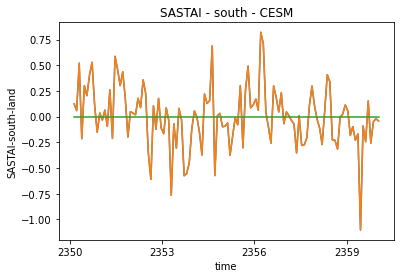

In [13]:
sea_air_surface_temperature_anomaly_south_all(CESM_alldata).plot(label = "all")
sea_air_surface_temperature_anomaly_south_ocean(CESM_alldata).plot(label = "ocean")
sea_air_surface_temperature_anomaly_south_land(CESM_alldata).plot(label = "land")
plt.title("SASTAI - south - CESM")